# Hyperparameter Optimization For Xgboost on Cancer-Genome Dataset

In [2]:
# Load packages:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb   
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
# Step 1: Read the dataset:
Train = pd.read_csv('Original_data/Train_Set.csv')
Test = pd.read_csv("Original_data/Test_Set.csv")
X_train = Train.iloc[:,0:-1]
X_test = Test.iloc[:,0:-1]
y_train = Train.iloc[:,-1].apply(lambda x: 1 if 'cancer' in x else 0) # prediction classes as binary values lambda funciton
y_test = Test.iloc[:,-1].apply(lambda x: 1 if 'cancer' in x else 0)

# Step 2: Define parameter grid for Hyperparameter optimization:
parameters={
 'n_estimators'   : [500, 750, 1000], #Amount of trees
 'learning_rate'  : [0.01, 0.05, 0.1], # How much do the model update its residuals learn from each trees miscalculation
 'max_depth'          : [3, 5, 6, 8, 10], # What is the highest amount of nodes on a tree, goes high as there is a lot of parameters
 "colsample_bytree"  : [0.5, 0.8, 0.9], #How big a precentage of columns are sampled for each tree
 'reg_lambda'      : [1, 2, 4],
 'reg_alpha'       : [0, 0.5, 3],
}

# Step 3: Instantiate XGBoost Classifier
model = xgb.XGBClassifier(
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 scale_pos_weight = 60/2144,
 objective = 'binary:logistic',
 seed=27)




# Step 4: Instantiate RandomizedSearchCV
random_classifier = xgb.XGBClassifier(
    min_child_weight=1,
    subsample=0.8,
    objective = 'binary:logistic',
    scale_pos_weight = 60/2144,
    seed=27)
random_search = RandomizedSearchCV(random_classifier, param_distributions=parameters, n_iter=40, cv=5, scoring=['f1_weighted', 'precision_weighted', 'recall_weighted'], refit='f1_weighted', random_state=42, verbose=2)

In [11]:
# Step 5: Fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
Test['Predictions'] = predictions
Test['class_label'] = y_test
Test[1:100]

,length_51,length_52,length_53,length_54,length_55,length_56,length_57,length_58,length_59,length_60,...,length_394,length_395,length_396,length_397,length_398,length_399,length_400,class_label,Predictions,Correct_prediction
1,0.005132,0.004886,0.004952,0.005123,0.005237,0.005530,0.006147,0.006655,0.007607,0.008042,...,0.009207,0.008628,0.008210,0.007823,0.007412,0.007054,0.006992,0,0,True
2,0.006114,0.005463,0.005444,0.005369,0.005425,0.005897,0.006341,0.007238,0.008696,0.008772,...,0.017700,0.017124,0.016344,0.015406,0.014876,0.014111,0.013640,0,1,False
3,0.000158,0.000089,0.000085,0.000097,0.000107,0.000142,0.000141,0.000184,0.000206,0.000189,...,0.006070,0.005884,0.005488,0.005127,0.004942,0.004801,0.004483,0,0,True
4,0.000215,0.000116,0.000129,0.000144,0.000160,0.000186,0.000224,0.000226,0.000345,0.000321,...,0.004561,0.004232,0.003967,0.003795,0.003561,0.003568,0.003286,0,0,True
5,0.012062,0.011147,0.010975,0.011417,0.011413,0.012435,0.013751,0.014878,0.017012,0.018510,...,0.011072,0.010583,0.010081,0.009538,0.009022,0.008651,0.008649,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003570,0.003467,0.003663,0.003889,0.004136,0.004422,0.004770,0.005460,0.006757,0.007509,...,0.004276,0.003966,0.003727,0.003601,0.003454,0.003472,0.003312,1,1,True
96,0.004310,0.004244,0.004475,0.004783,0.004905,0.005180,0.005881,0.006599,0.007998,0.008975,...,0.004070,0.004002,0.003655,0.003578,0.003469,0.003346,0.003197,1,1,True
97,0.004936,0.005088,0.005200,0.005573,0.005903,0.006229,0.006909,0.007755,0.009325,0.010641,...,0.004134,0.003990,0.003683,0.003471,0.003345,0.003268,0.003130,1,1,True
98,0.005836,0.005876,0.006056,0.006472,0.006670,0.007183,0.007904,0.008844,0.010672,0.012416,...,0.003966,0.003958,0.003623,0.003575,0.003266,0.003309,0.003161,1,1,True


In [12]:
from sklearn.metrics import f1_score
f1_no_optimization = f1_score(y_true = Test['class_label'], y_pred= Test['Predictions'])
print(f"f1 score: {f1_no_optimization}")

from sklearn.metrics import average_precision_score
PRC_no_optimization = average_precision_score(y_true = Test['class_label'], y_score= Test['Predictions'])
print(f"Precision-Recall AUC of predictions: {PRC_no_optimization}")

f1 score: 0.9519379844961241
Precision-Recall AUC of predictions: 0.9764483590780475


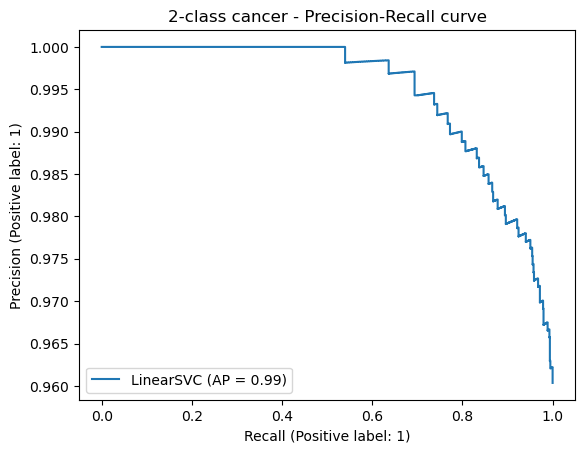

In [13]:
# Plot of non optimized parameters model:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(estimator=model, X= X_test, y= y_test, name= 'LinearSVC')
_ = display.ax_.set_title("2-class cancer - Precision-Recall curve")

Text(0.5, 1.0, 'Normalized Confusion Matrix')

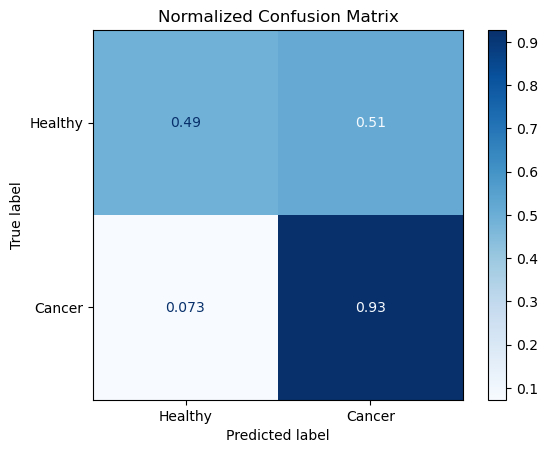

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    estimator=model,
    X = X_test,
    y = y_test,
    display_labels= ['Healthy', 'Cancer'],
    cmap=plt.cm.Blues,
    normalize='true',
    )
disp.ax_.set_title("Normalized Confusion Matrix")


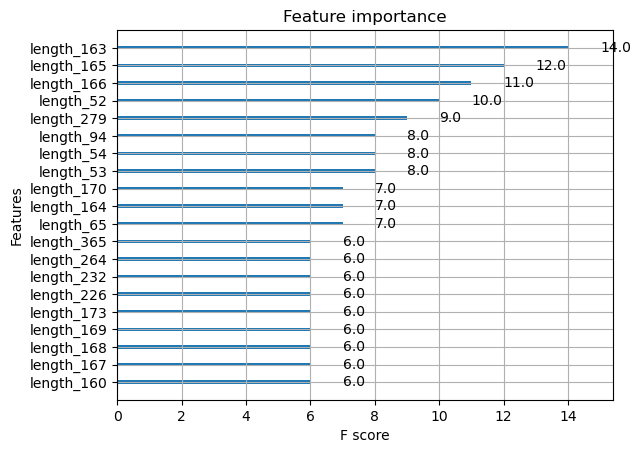

In [234]:
xgb.plot_importance(model,max_num_features=20)
plt.show()

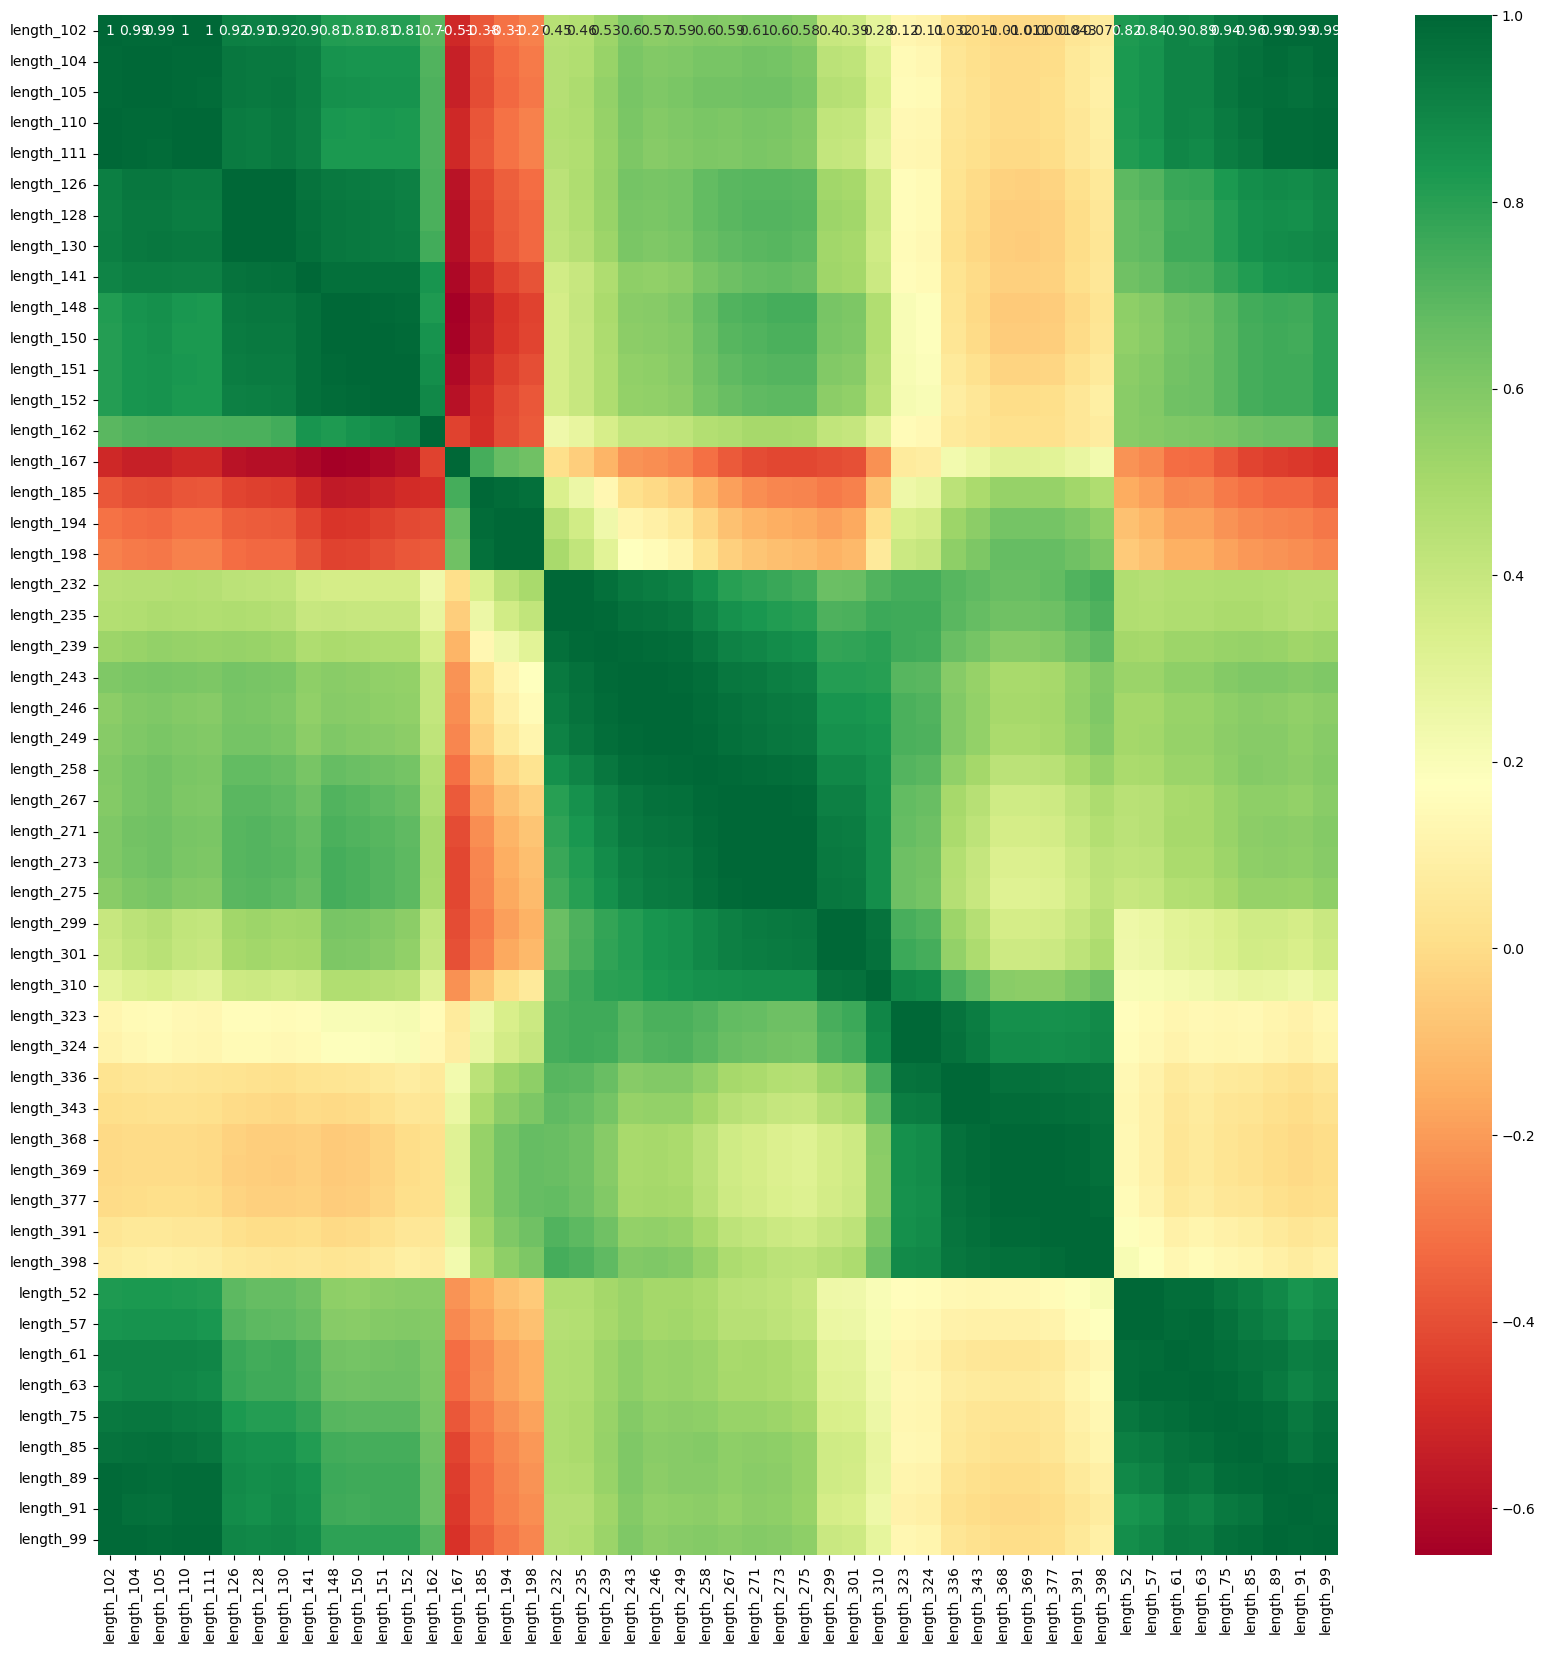

In [235]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = Train.iloc[:,:-1].sample(n=50, axis='columns')
corrmat = corrmat[sorted(corrmat.columns)]
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
random_search.fit(X_train, y_train, verbose=1)
# Step 6: Evaluate the model
best_model = random_search.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=750, reg_alpha=0, reg_lambda=2; total time=  14.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=750, reg_alpha=0, reg_lambda=2; total time=  13.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=750, reg_alpha=0, reg_lambda=2; total time=  13.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=750, reg_alpha=0, reg_lambda=2; total time=  13.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=750, reg_alpha=0, reg_lambda=2; total time=  13.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=500, reg_alpha=0.5, reg_lambda=4; total time=  10.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=500, reg_alpha=0.5, reg_lambda=4; total time=  10.7s
[CV] END colsample_bytree=0.8, learning_rat

In [5]:
from sklearn.model_selection import cross_val_score
cv_results= pd.DataFrame(random_search.cv_results_)
#score=cross_val_score(xgboost,X,Y_mapped,cv=10)

In [6]:
# Step 5: Fit the model
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)
Test['Predictions'] = predictions
Test['class_label'] = y_test

In [7]:
Test['Correct_prediction'] = Test['class_label'] == Test['Predictions']
print(f"Mean amount of correct predictions: {Test['Correct_prediction'].mean()}")

ROC_no_optimization = roc_auc_score(y_true = Test['class_label'], y_score= Test['Predictions'])
print(f"ROC_AUC of predictions: {ROC_no_optimization}")

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true = Test['class_label'], y_pred= Test['Predictions'], average='weighted')

Mean amount of correct predictions: 0.902321083172147


NameError: name 'roc_auc_score' is not defined

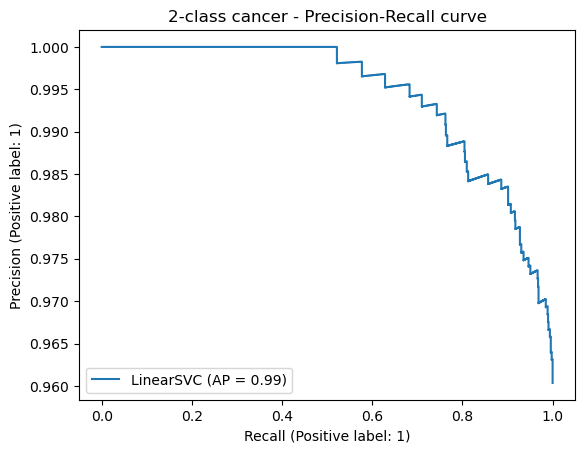

In [ ]:
# Plot of non optimized parameters model:
display = PrecisionRecallDisplay.from_estimator(estimator=best_model, X= X_test, y= y_test, name= 'LinearSVC')
_ = display.ax_.set_title("2-class cancer - Precision-Recall curve")

Text(0.5, 1.0, 'Normalized Confusion Matrix')

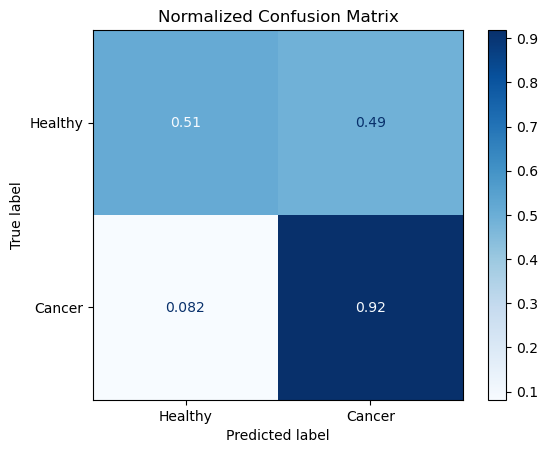

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    estimator=best_model,
    X = X_test,
    y = y_test,
    display_labels= ['Healthy', 'Cancer'],
    cmap=plt.cm.Blues,
    
    normalize='true'
    )
disp.ax_.set_title("Normalized Confusion Matrix")

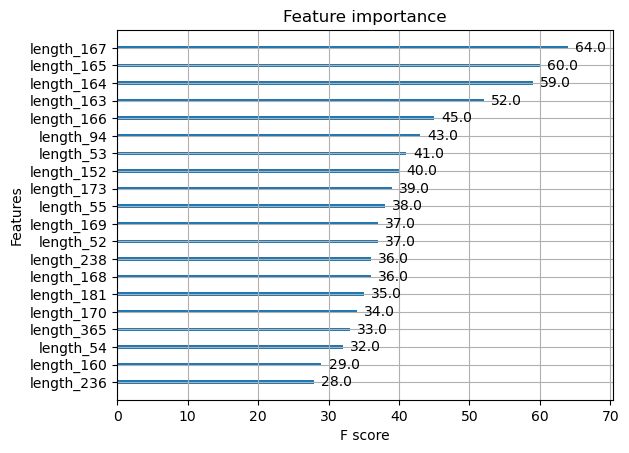

In [10]:
xgb.plot_importance(best_model,max_num_features=20)
plt.show()